In [1]:
from src.data_model.models import (DataLoader, FeatureEngineer, CorrelationAnalyzer)

loader = DataLoader(r'C:\Users\Salih\Documents\GitHub\prediction-system-marginal-price\data\raw\combined_data.csv')
df = loader.load_data()

engineer = FeatureEngineer(df)
engineer.add_direction_dummies()
engineer.drop_unnecessary_columns()
engineer.calculate_average_prices()


Missing values handled.
Data loaded successfully.
Unnecessary columns dropped.
Average prices calculated.


c:\Users\Salih\Documents\GitHub\prediction-system-marginal-price\src\data_model\models.py:46: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  self.df = self.df.asfreq('H')
c:\Users\Salih\Documents\GitHub\prediction-system-marginal-price\src\data_model\models.py:54: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  self.df['izmir_coco'].fillna(self.df['izmir_coco'].mean(), inplace=True)
c:\Users\Salih\Documents\GitHub\prediction-system-marginal-price\src\data_model\models.py:55: F

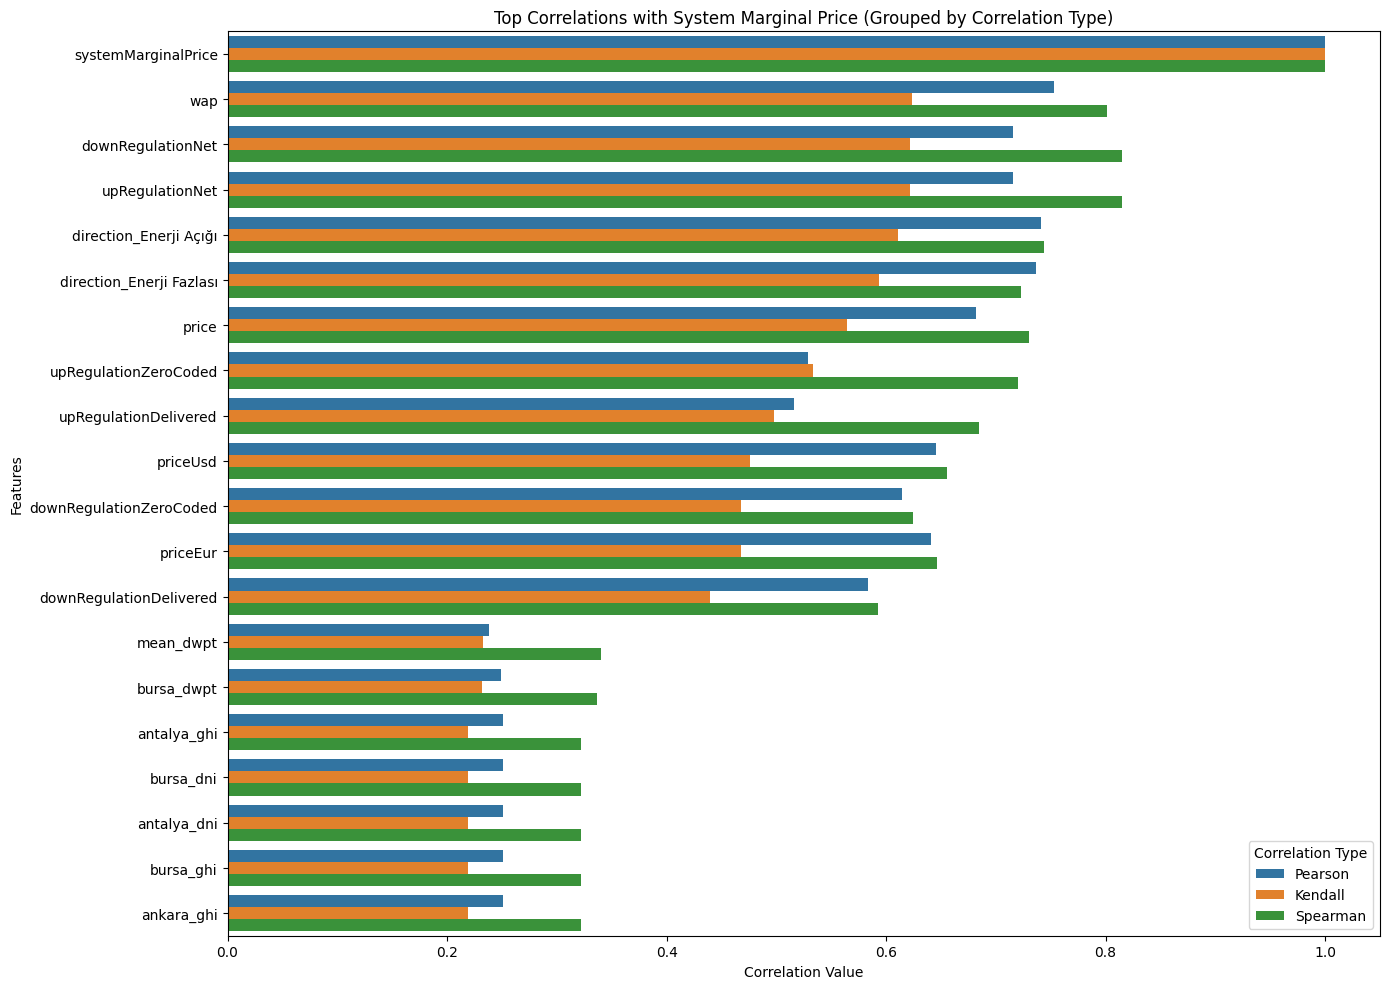

Correlation plot displayed.


In [2]:
analyzer = CorrelationAnalyzer(engineer.df, target='systemMarginalPrice')
top_corr_df_20 = analyzer.compute_correlations()
analyzer.plot_correlations(top_corr_df_20)


In [4]:
df_without_lags = engineer.df


In [ ]:
X = df_without_lags.drop(columns=['systemMarginalPrice'])
y = df_without_lags['systemMarginalPrice']

# Split data
split_point = int(len(X) * 0.8)
X_train, X_test = X.iloc[:split_point], X.iloc[split_point:]
y_train, y_test = y.iloc[:split_point], y.iloc[split_point:]

In [ ]:
columns_to_lag = [
        'upRegulationNet', 'downRegulationNet', 'upRegulationZeroCoded',
        'upRegulationDelivered','downRegulationZeroCoded','downRegulationDelivered',
        'direction_Dengede', 'direction_Enerji Açığı','direction_Enerji Fazlası'
    ]
engineer.add_hourly_lags(columns_to_lag, lag_hours=24)
df_with_lags = engineer.df